In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

c:\users\wende\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [77]:
#import indices

# ibov, s&p, dow jones, nasdaq, ftse(londres), dax 30
#indices = ['^BVSP', '^GSPC','^DJI','^IXIC','^GDAXI','^N225','^N100','^HSI']
indices = ['^BVSP', '^GSPC','^DJI','^IXIC']

data = pd.DataFrame()

for i in indices:
    data[i] = wb.DataReader(i, data_source='yahoo', start='2008-1-1')['Adj Close']

In [78]:
data.head()

,^BVSP,^GSPC,^DJI,^IXIC
Date,,,,
2008-01-02,62815.0,1447.160034,13043.959961,2609.629883
2008-01-03,62892.0,1447.160034,13056.719727,2602.679932
2008-01-04,61037.0,1411.630005,12800.179688,2504.649902
2008-01-07,60772.0,1416.180054,12827.490234,2499.459961
2008-01-08,62081.0,1390.189941,12589.070312,2440.510010


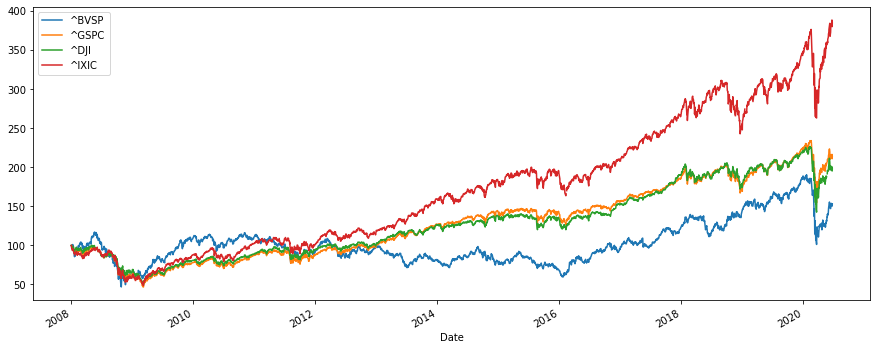

In [79]:
#normalization to 100
normalization = (data/data.iloc[0]) * 100
normalization.plot(figsize=(15,6))
plt.show()

In [80]:
#calculate returns of indices
returns = (data/data.shift(1)) - 1
returns.tail()

,^BVSP,^GSPC,^DJI,^IXIC
Date,,,,
2020-06-19,0.004650,-0.005649,-0.008000,0.000309
2020-06-22,-0.012799,0.006495,0.005933,0.011096
2020-06-23,0.006703,0.004307,0.005039,0.007447
2020-06-24,-0.016650,-0.025855,-0.027151,-0.021932
2020-06-25,0.017018,0.010959,0.011776,0.010882


In [81]:
#annual returns
annual_returns = returns.mean() * 250
final = str(round(annual_returns,4) * 100)
print (final)

^BVSP     7.63
^GSPC     9.68
^DJI      8.85
^IXIC    14.56
dtype: float64


In [82]:
#compare stocks with indices

stocks2 = ['GOOG','^DJI','^GSPC']

df2 = pd.DataFrame()

for i in stocks2:
    df2[i] = wb.DataReader(i, data_source='yahoo', start='2008-1-1')['Adj Close']

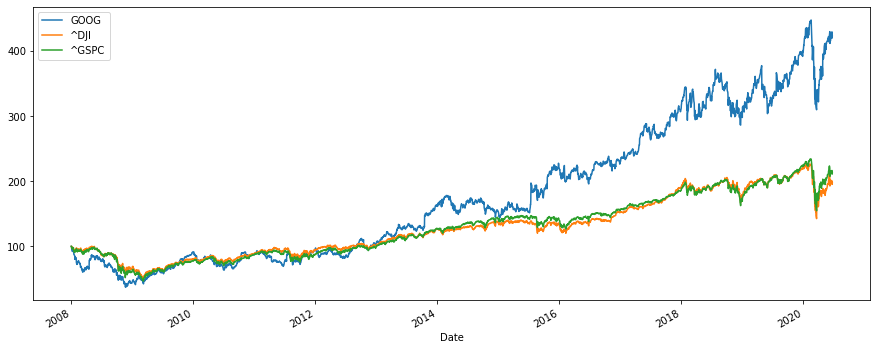

In [83]:
#normalization to 100
normalization2 = (df2/df2.iloc[0]) * 100
normalization2.plot(figsize=(15,6))
plt.show()